In [3]:
# Import TensorFlow library
import tensorflow as tf

# Import Keras from TensorFlow
from tensorflow import keras

# Import layers module from Keras
from tensorflow.keras import layers

# Import Dense layer from Keras layers
from keras.layers import Dense

# Import PyDataset utility from Keras (Note: this import seems unused in the code)
from keras.utils import PyDataset

# Import ImageDataGenerator for image preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size (224x224 pixels)
IMG_SIZE = 224

# Define batch size for training
BATCH_SIZE = 32

# Create an ImageDataGenerator with rescaling and validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\raksh\Downloads\archive (4)\Shoe vs Sandal vs Boot Dataset",  # Directory path for training images
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to IMG_SIZE
    batch_size=BATCH_SIZE,  # Use defined batch size
    class_mode='categorical',  # Use categorical labels
    subset='training'  # Specify this is the training subset
)

# Create a generator for validation data
val_generator = train_datagen.flow_from_directory(
    r"C:\Users\raksh\Downloads\archive (4)\Shoe vs Sandal vs Boot Dataset",  # Directory path for validation images (same as training in this case)
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to IMG_SIZE
    batch_size=BATCH_SIZE,  # Use defined batch size
    class_mode='categorical',  # Use categorical labels
    subset='validation'  # Specify this is the validation subset
)

# Get the list of class names from the training generator
classes = list(train_generator.class_indices)

# Print the list of classes
print(classes)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
['Boot', 'Sandal', 'Shoe']


In [4]:
# Define a Sequential model
model = keras.Sequential([
    # First Convolutional layer
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    # Max Pooling layer after first Conv2D
    layers.MaxPooling2D((2,2)),
    
    # Second Convolutional layer
    layers.Conv2D(64, (3,3), activation='relu'),
    # Max Pooling layer after second Conv2D
    layers.MaxPooling2D((2,2)),
    
    # Third Convolutional layer
    layers.Conv2D(128, (3,3), activation='relu'),
    # Max Pooling layer after third Conv2D
    layers.MaxPooling2D((2,2)),
    
    # Flatten layer to convert 2D feature maps to 1D feature vector
    layers.Flatten(),
    
    # First Dense (fully connected) layer
    layers.Dense(128, activation='relu'),
    
    # Output Dense layer with 3 units (assuming 3 classes) and softmax activation
    layers.Dense(3, activation='softmax')
])  

C:\Users\raksh\anaconda4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='categorical_crossentropy',  # Use categorical crossentropy loss for multi-class classification
    metrics=['accuracy']  # Track accuracy metric during training
)

# Train the model
model.fit(
    train_generator,  # Use the training data generator
    validation_data=val_generator,  # Use the validation data generator
    epochs=5  # Train for 5 epochs
)

Epoch 1/5


C:\Users\raksh\anaconda4\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7863 - loss: 0.7535 - val_accuracy: 0.9020 - val_loss: 0.3093
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.9475 - loss: 0.1563 - val_accuracy: 0.9550 - val_loss: 0.1212
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.9773 - loss: 0.0712 - val_accuracy: 0.9617 - val_loss: 0.1327
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.9867 - loss: 0.0414 - val_accuracy: 0.9647 - val_loss: 0.1179
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 582s 2s/step - accuracy: 0.9921 - loss: 0.0235 - val_accuracy: 0.9610 - val_loss: 0.1440


In [6]:
# Save the trained model to a file named "Model.h5"
model.save("Model.h5")

In [7]:
# Import the load_model function from Keras
from tensorflow.keras.models import load_model

# Import the image module from Keras preprocessing
from tensorflow.keras.preprocessing import image

# Import numpy for array operations
import numpy as np

# Load the previously saved model from the file 'Model.h5'
model = load_model('Model.h5')

# Print a message indicating that the model has been loaded successfully
print("Model Loaded")

Model Loaded


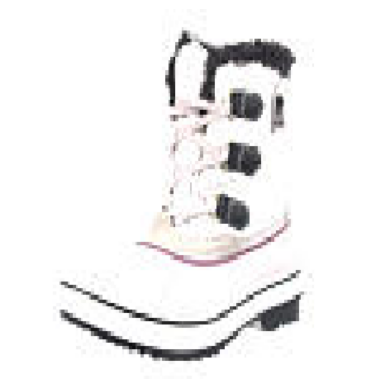

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the test image
test_image_path = r"C:\Users\raksh\Downloads\archive (4)\Shoe vs Sandal vs Boot Dataset\Boot\boot (959).jpg"

# Load the image and resize it to 224x224 pixels
img = image.load_img(test_image_path, target_size=(224,224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions of the array to create a batch of size 1
img_array = np.expand_dims(img_array, axis=0)

# Display the image
plt.imshow(img)
plt.axis('off')  # This removes the axis ticks
plt.show()

In [12]:
# Normalize the pixel values to the range [0, 1]
img_array /= 255.

# Use the model to make a prediction on the preprocessed image
prediction = model.predict(img_array)

# Print the raw prediction array
print(prediction)

# Find the index of the highest probability in the prediction
val = np.argmax(prediction)

# Print the index of the predicted class
print(val)

# Print the name of the predicted class
print(classes[val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[9.9999559e-01 1.2340242e-08 4.4439639e-06]]
0
Boot
